In [1]:
import torch

In [2]:
import sys
sys.path.insert(0, '/home/skynet/Zhifan/repos/CPF/')

In [3]:
from libzhifan.geometry import SimpleMesh
from libzhifan.geometry import project_standardized, color_verts
from libzhifan import epylab

In [4]:
action = 'P01_03_right_hand_1926_1983'
path = f'/home/skynet/Zhifan/homan-master/results/epichor/samples/{"bottle"}/{action}/homan.pth'
homan = torch.load(path)

In [5]:
vh, _ = homan.get_verts_hand()
vo, _ = homan.get_verts_object()

fh = homan.faces_hand[0]
fo = homan.faces_object[0]

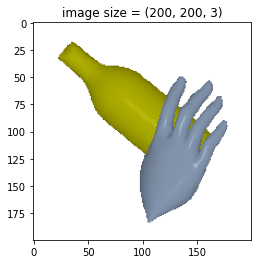

In [6]:
s = 0
m = 15
e = 24
mh = SimpleMesh(vh[s], fh, tex_color='light_blue')
mo = SimpleMesh(vo[s], fo, tex_color='yellow')
epylab.eimshow(
    project_standardized([mh, mo], direction='-x')
)

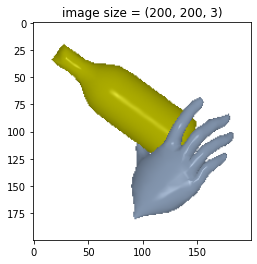

In [8]:
i = m
mh = SimpleMesh(vh[i], fh, tex_color='light_blue')
mo = SimpleMesh(vo[i], fo, tex_color='yellow')
epylab.eimshow(
    project_standardized([mh, mo], direction='-x')
)

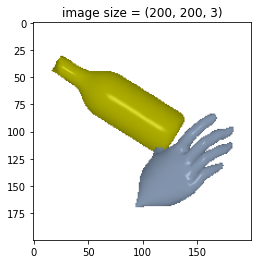

In [9]:
i = e
mh = SimpleMesh(vh[i], fh, tex_color='light_blue')
mo = SimpleMesh(vo[i], fo, tex_color='yellow')
epylab.eimshow(
    project_standardized([mh, mo], direction='-x')
)

In [10]:
from homan.utils.mesh_interaction import mesh_distance_approx
def get_sca_verts(vh, fh, vo, fo):
    """ list of N sets """
    _, d2 = mesh_distance_approx(vh, vo, fh, fo)

    lb, ub = -0.01, 0.01  # Used in evaluation
    indices_list = []
    for f in range(d2.shape[0]):
        nz = torch.nonzero((d2[f] > lb) & (d2[f] < ub)).view(-1)
        indices_list.append(set(nz.tolist()))

    unions = indices_list[0]
    inters = indices_list[0]
    for indices in indices_list:
        unions = unions.union(indices)
        inters = inters.intersection(indices)
    return indices_list, inters, unions

/home/skynet/miniconda3/envs/phosa16_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629403081/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  del sys.path[0]


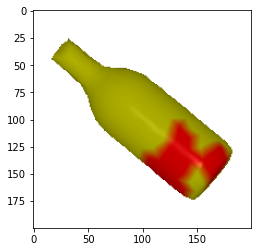

In [11]:
mo = SimpleMesh(vo[0], fo, tex_color='yellow')

ind_list, inters, unions = get_sca_verts(vh, fh.long(), vo, fo.long())
unions = ind_list[0].union(ind_list[15]).union(ind_list[24])
inters = ind_list[0].intersection(ind_list[15]).intersection(ind_list[24])
mo_iou = color_verts(mo.copy(), list(unions), (255, 0, 0))
# mo_iou = color_verts(mo_iou, list(inters), (0, 255, 0))

proj_iou = project_standardized(mo_iou, direction='-x', )
epylab.imshow(proj_iou)

In [12]:
len(inters)/len(unions)

0.0

In [51]:
mo_iou.visual.vertex_colors

TrackedArray([[255,   0,   0, 255],
              [216, 216,   0, 255],
              [216, 216,   0, 255],
              ...,
              [216, 216,   0, 255],
              [216, 216,   0, 255],
              [216, 216,   0, 255]], dtype=uint8)

In [ ]:
# homan_unions = {0, 5, 265, 270, 16, 18, 275, 23, 27, 284, 31, 289, 35, 294, 40, 46, 303, 48, 50, 306, 51, 54, 56, 312, 313, 69, 70, 72, 335, 340, 341, 342, 88, 344, 346, 347, 92, 351, 96, 99, 356, 358, 103, 362, 363, 107, 109, 113, 374, 119, 376, 122, 128, 129, 130, 393, 138, 395, 396, 145, 146, 147, 404, 149, 151, 158, 415, 417, 428, 431, 180, 183, 184, 188, 191, 192, 193, 449, 195, 196, 448, 198, 203, 464, 210, 474, 221, 481, 486, 231, 489, 496, 244, 250}

# homan_mo = project_standardized(dmo_iou, direction='-x', )
homan_iou = color_verts(mo.copy(), list(homan_unions), (255, 0, 0))
# homan_iou = color_verts(homan_iou, list({}), (0, 255, 0))

proj_iou = project_standardized(homan_iou, direction='+x', )
epylab.imshow(proj_iou)

In [48]:
print(unions)

{0, 5, 265, 270, 16, 18, 275, 23, 27, 284, 31, 289, 35, 294, 40, 46, 303, 48, 50, 306, 51, 54, 56, 312, 313, 69, 70, 72, 335, 340, 341, 342, 88, 344, 346, 347, 92, 351, 96, 99, 356, 358, 103, 362, 363, 107, 109, 113, 374, 119, 376, 122, 128, 129, 130, 393, 138, 395, 396, 145, 146, 147, 404, 149, 151, 158, 415, 417, 428, 431, 180, 183, 184, 188, 191, 192, 193, 449, 195, 196, 448, 198, 203, 464, 210, 474, 221, 481, 486, 231, 489, 496, 244, 250}
